# BINARY CLASSIFICATION METRICS MODEL EVALUATION

In this classification project, I trained a logistic regression model and evaluated its performance by calculating overall accuracy from its confusion matrix.

### [Let's Connect on LinkedIn - Prince Peter](https://www.linkedin.com/in/peter-prince/)

## Project objectives

By the end of this project, I want to have achieved;
* Train a logistic regression model.
* Calculate the model's overall accuracy.

## Import libraries and dataset

In an effort to conserve a particular endangered animal species, I want to be able to predict the suitability of various habitats. I have a dataset, `habitat_suitability`, that contains various environmental and ecological features used to determine whether or not a habitat is suitable for the species.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
# Load dataset
habitat_df= pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/habitat_suitability.csv")
habitat_df.head(5)

,Average Temperature (°C),Annual Rainfall (mm),Vegetation Density (% coverage),Predator Presence (0 or 1),Human Disturbance Index,Altitude (meters),Water Source Availability (0 or 1),Habitat Suitability
0,20.009527,1270.407873,90.142754,1,0.392750,355.433041,1,1
1,16.228576,1419.881504,58.246594,0,0.356556,64.890245,1,1
2,25.472638,991.750374,57.898060,1,0.832856,301.426259,1,0
3,34.030446,1431.824231,41.892067,1,0.044347,390.152269,1,0
4,38.334526,1018.262946,56.814597,1,0.308421,450.584113,1,0


# Brief EDA

In [16]:
habitat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Average Temperature (°C)            1000 non-null   float64
 1   Annual Rainfall (mm)                1000 non-null   float64
 2   Vegetation Density (% coverage)     1000 non-null   float64
 3   Predator Presence (0 or 1)          1000 non-null   int64  
 4   Human Disturbance Index             1000 non-null   float64
 5   Altitude (meters)                   1000 non-null   float64
 6   Water Source Availability (0 or 1)  1000 non-null   int64  
 7   Habitat Suitability                 1000 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 62.6 KB


In [17]:
habitat_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average Temperature (°C),1000.0,25.068349,5.206463,6.558174,21.539219,25.010066,28.602496,40.588406
Annual Rainfall (mm),1000.0,1004.677360,203.723082,232.668890,872.409395,1005.771860,1136.011012,1675.476584
Vegetation Density (% coverage),1000.0,65.183446,20.668525,30.011042,47.338328,64.133888,83.886498,99.953459
Predator Presence (0 or 1),1000.0,0.684000,0.465146,0.000000,0.000000,1.000000,1.000000,1.000000
Human Disturbance Index,1000.0,0.492330,0.294971,0.001418,0.230218,0.476140,0.763110,0.998303
Altitude (meters),1000.0,501.434510,200.906564,-164.222911,371.681273,502.024896,629.155720,1175.553648
Water Source Availability (0 or 1),1000.0,0.804000,0.397167,0.000000,1.000000,1.000000,1.000000,1.000000
Habitat Suitability,1000.0,0.240000,0.427297,0.000000,0.000000,0.000000,0.000000,1.000000


In [18]:
habitat_df.shape

(1000, 8)

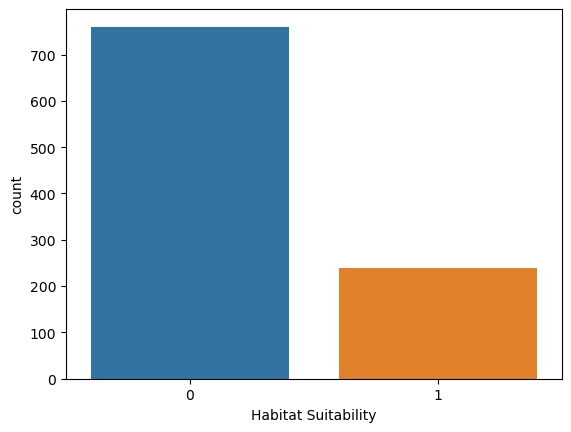

In [24]:
# Balance of target variable
sns.countplot(x= 'Habitat Suitability', data=habitat_df)
plt.show()

The image is the output, where '1' and '0' represent suitable (1) or unsuitable (0)., respectively. The `countplot` indicates whether the dataset is balanced between these classes or if there is class imbalance.

In our case class '0' has a higher count than class '1', indicating that there are more instances of class '0' in the dataset. This is an indication of **imbalance** in class distribution or an implication that **accuracy** might not be a suitable performance metric as the model could simply predict the majority class for all instances and still achieve a deceptively high accuracy. See the `Recommendation cell after the model evaluation at the end of the project`

## Objective

Using the dataset, I want to build a classification model that will be able to classify habitats as suitable (1) or unsuitable (0).

In the code below, I have prepared the dataset and trained a logistic regression model following these preliminary steps.

In [3]:
# Prepare the data
X = habitat_df.drop('Habitat Suitability', axis=1)  # Features
y = habitat_df['Habitat Suitability']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

### Step 1

**a)** 

Now that I have trained a logistic regression model on the `habitat_suitability` dataset, let me try and get information on how our model performs on new unseen data.

Hence: 

1. I will use the trained logistic regression model to make predictions on the test set.
2. Import and use `confusion_matrix` from `sklearn.metrics` to generate the confusion matrix for your predictions.
3. Display the confusion matrix.

**Note:** Remember I will need to scale the test set features also to ensure consistency.

In [8]:
# Your solution here...
# Import the confusion_matrix function from sklearn's metrics module
from sklearn.metrics import confusion_matrix

# Scale the test dataset features using the same scaler that was applied to the training dataset
X_test_scaled = scaler.transform(X_test)

# Use the trained logistic regression model to predict the outcomes for the scaled test dataset.
y_pred = model.predict(X_test_scaled)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[143   9]
 [ 16  32]]


I used the `confusion_matrix` function from `sklearn` to compare
the model's predicted values against the actual values from the test dataset.

It displays the correct and incorrect predictions across the different classes. 

**b)** 

The confusion matrix is not easy to read. Let's improve on this by converting it into a DataFrame with the following row and column labels `0: Unsuitable` and `1: Suitable`. 

In [9]:
# Define the labels for the confusion matrix
labels = ['0: Unsuitable ', '1: Suitable']

# Create a Pandas DataFrame from the confusion matrix data and the labels defined above
matrix_df = pd.DataFrame(data=conf_matrix, index=labels, columns=labels)

# Display the resulting DataFrame
matrix_df

,0: Unsuitable,1: Suitable
0: Unsuitable,143,9
1: Suitable,16,32


I created a Pandas DataFrame to neatly display our previously generated confusion matrix by labelling the rows and columns according to the outcomes they represent. 

### Step 2
Now that we can easily interpret our confusion matrix, I want to compare the distribution of the ground truth classifications and the classifications made by the model. 

That is, I want to find out how many observations were classified as suitable (1) and unsuitable (0) habitats by the model and compare this to the counts originally in the test set.


In [10]:
# Sum of each row: Ground truth totals for each class
ground_truth_totals = matrix_df.sum(axis=1)
print("Ground Truth Totals for Each Class:")
print(ground_truth_totals)

# Sum of each column: Totals for the predictions for each class
prediction_totals = matrix_df.sum(axis=0)
print("\nPrediction Totals for Each Class:")
print(prediction_totals)

Ground Truth Totals for Each Class:
0: Unsuitable     152
1: Suitable        48
dtype: int64

Prediction Totals for Each Class:
0: Unsuitable     159
1: Suitable        41
dtype: int64


I calculated the ground truth totals for each class by summing up the rows of the confusion matrix DataFrame. 

On the other hand, I calculated the totals for the predictions for each class by summing up the columns of the confusion matrix DataFrame.

Analysing the ground truth totals can help understand the class balance or imbalance inherent in the dataset, while examining the prediction totals can reveal if the model has a bias towards predicting one class more than another.

### Step 3

From the multidimensional array `conf_matrix`, access the true positive, true negative, false positive, and false negative values and store them in the following variables `TP`, `TN`, `FP`, and `FN`, respectively. 

Print each value together with its label.

**Hint:** Apply domain knowledge of where each of these values is located in the confusion matrix.

In [11]:
# Your solution here...
# Extracting True Positives (TP) from the confusion matrix, located at index [1, 1]
TP = conf_matrix[1, 1]

# Extracting True Negatives (TN) from the confusion matrix, located at index [0, 0]
TN = conf_matrix[0, 0]

# Extracting False Positives (FP) from the confusion matrix, located at index [0, 1]
FP = conf_matrix[0, 1]

# Extracting False Negatives (FN) from the confusion matrix, located at index [1, 0]
FN = conf_matrix[1, 0]

print("True positive:", TP)
print("True negative:", TN)
print("False positive:", FP)
print("False negative", FN)

True positive: 32
True negative: 143
False positive: 9
False negative 16


I extracted and calculated each of the confusion matrix components which gave me insights into the types of errors the model is making, as well as its successes, which is crucial for understanding how the model is performing.

### Step 4

Let's now find out the overall accuracy of our model. 

**a)** Using the values from **Step 3**, I will calculate the overall accuracy using the formula: 
 
 $$Accuracy =  \frac{Correct\space predictions}{Total\space predictions}$$

**b)** Will comment on the suitability of using accuracy as the sole metric for evaluating the performance of our model.

In [12]:
# Your solution here...
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Overall Accuracy:", accuracy)

Overall Accuracy: 0.875


Based on the given formula, the correct predictions, which are represented by the `TP` and `TN`, are divided by the total predictions, which are all the values: `TP`, `TN`, `FP`, and `FN`.


### Recommendation

"The dataset exhibits a significant class imbalance, with 152 instances labeled as `Unsuitable` compared to 48 labeled as `Suitable`. 

This imbalance likely contributes to the high accuracy of 87.5%, as the model may be biased towards predicting the majority class. Therefore, relying solely on accuracy to evaluate the model's performance is insufficient. 

To gain a more comprehensive understanding, it's recommended to employ additional evaluation metrics such as precision, recall, F1 score, and AUC-ROC."

### [Let's Connect on LinkedIn - Prince Peter](https://www.linkedin.com/in/peter-prince/)